In [1]:
%run ../resources/library.py
style_notebook()

# Amplified Cognition Thru Data Visualization and GIS

# Learning Objectives

### Describe data visualizations

### Amplified cognition as a goal of data visualiztion

### Describe Geographic Information System (GIS) and spatial analysis in public health

### Discuss GIS tools and approaches to data analyses

### Recall 7 steps in developing visualizations

### Definition

In [2]:
print("Definition: \n\t data visualition \n\t\t represention and presentation of data \n\t\t that exploits our visual perception abilities \n\t\t  in order to amplify cognition.")

Definition: 
	 data visualition 
		 represention and presentation of data 
		 that exploits our visual perception abilities 
		  in order to amplify cognition.


### Amplified Cognition as a goal of Data Visualization

Data visualizations are visual representations of abstract data as numerical and non-numerical data, such as text and geographic information to reinforce human cognition.

One of the aims of Data Visualization is to reveal and make obvious patterns in a form of graphs or maps that were invisible when the data where in tabular form.

Information visualization presumes that "visual representations and interaction techniques take advantage of the human eye’s broad bandwidth pathway into the mind to allow users to see, explore, and understand large amounts of information at once.“

    James J. Thomas and Kristin A. Cook (Ed.) (2005). Illuminating the Path: The R&D Agenda for Visual Analytics Archived 2008-09-29 at the Wayback Machine.. National Visualization and Analytics Center. p.30

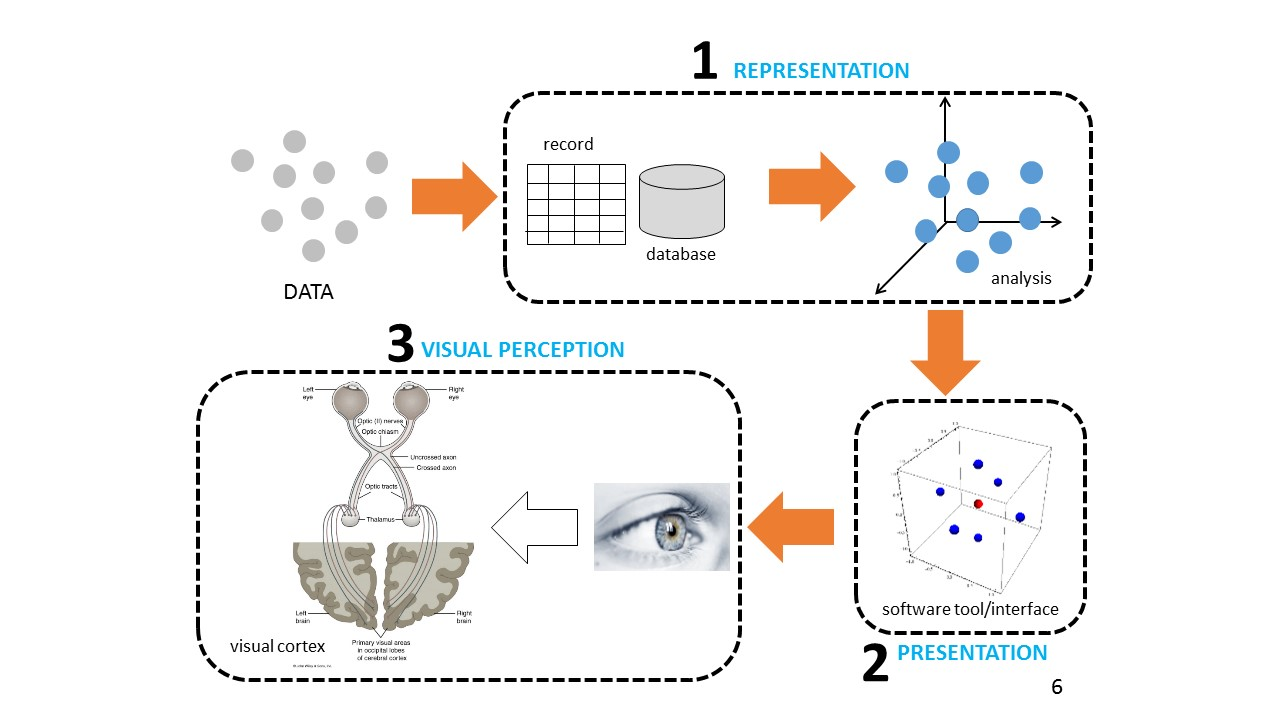

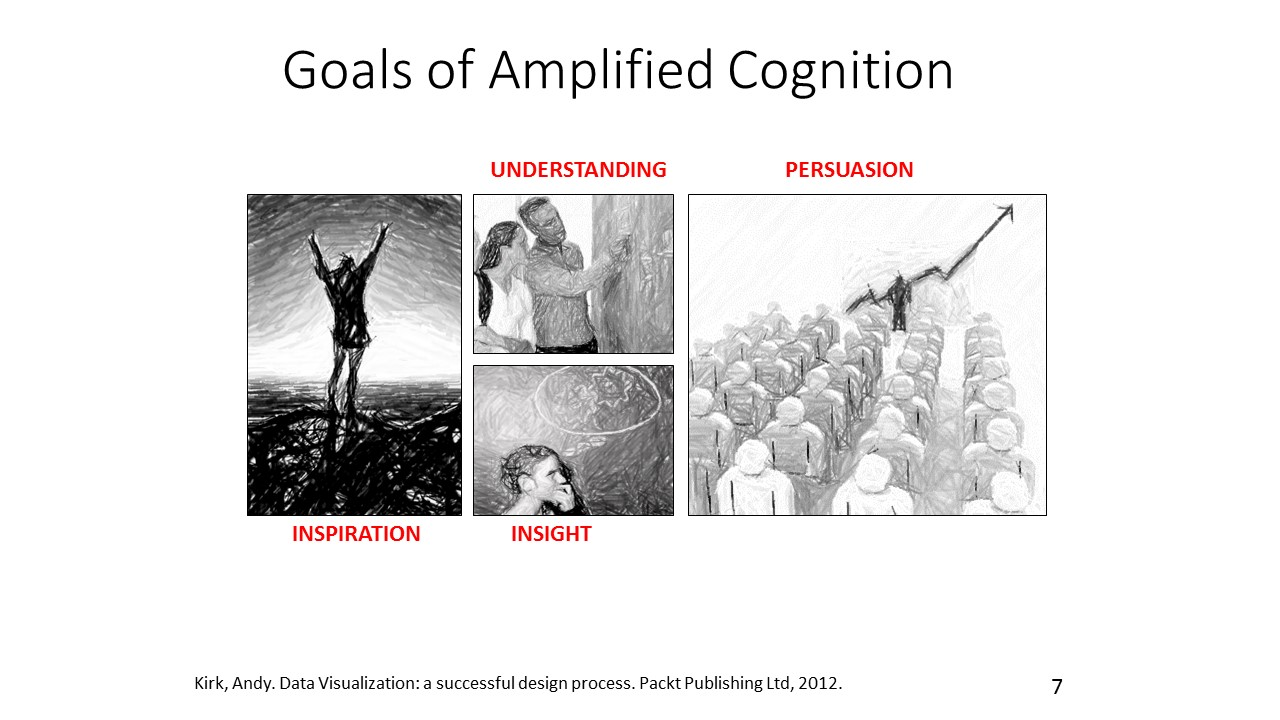

### Data Visualizaitions for Better Decision Making

Data visualization is essentially story-telling with the goal of revealing the outcome as quickly and efficiently as possible. 

Data visualization holds the potential to address the information overload using EMR systems. 

Automated data analysis in EMR can help with better transition from inpatient to the next stage of care.

Linkages of EMR systems to global epidemic information can help with accurate diagnosis. If EMR system detected that patient traveled from a location where epidemic exists, it would alert a medical personnel. (Example of T. Duncan, ebola patient in Texas). 

https://www.linkedin.com/pulse/data-visualization-standards-optimal-decision-making-russ-penlington

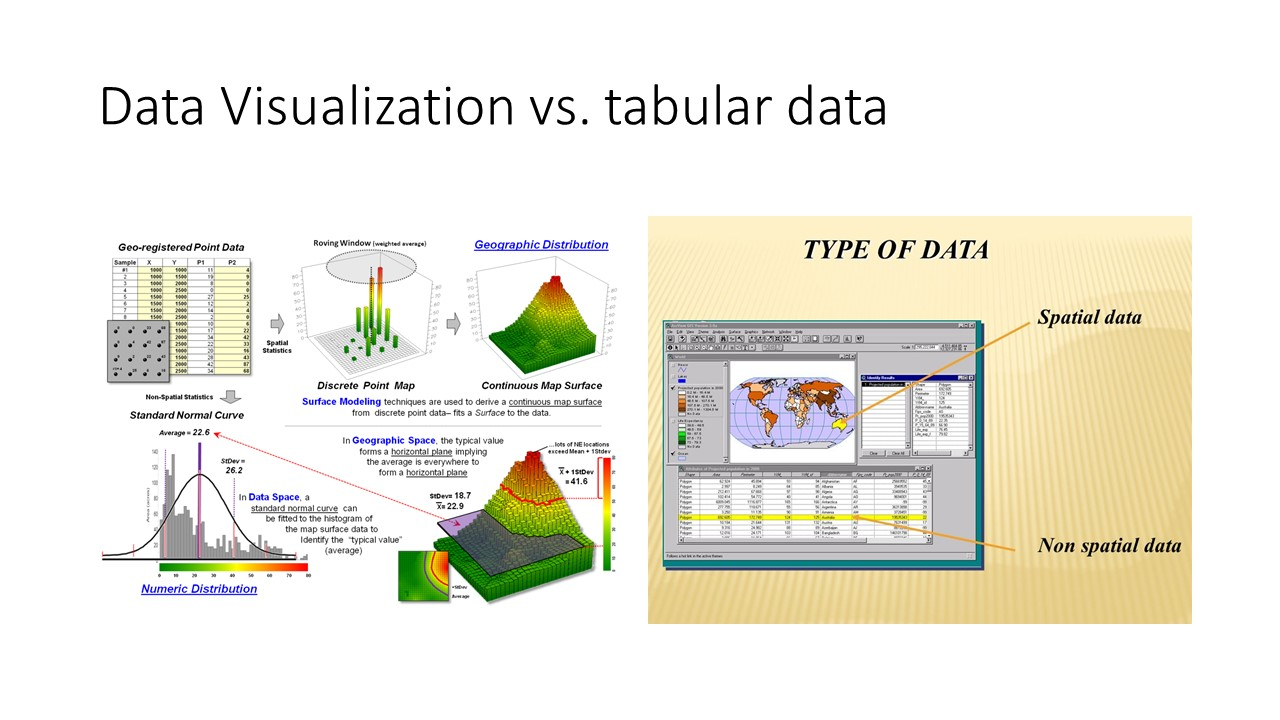

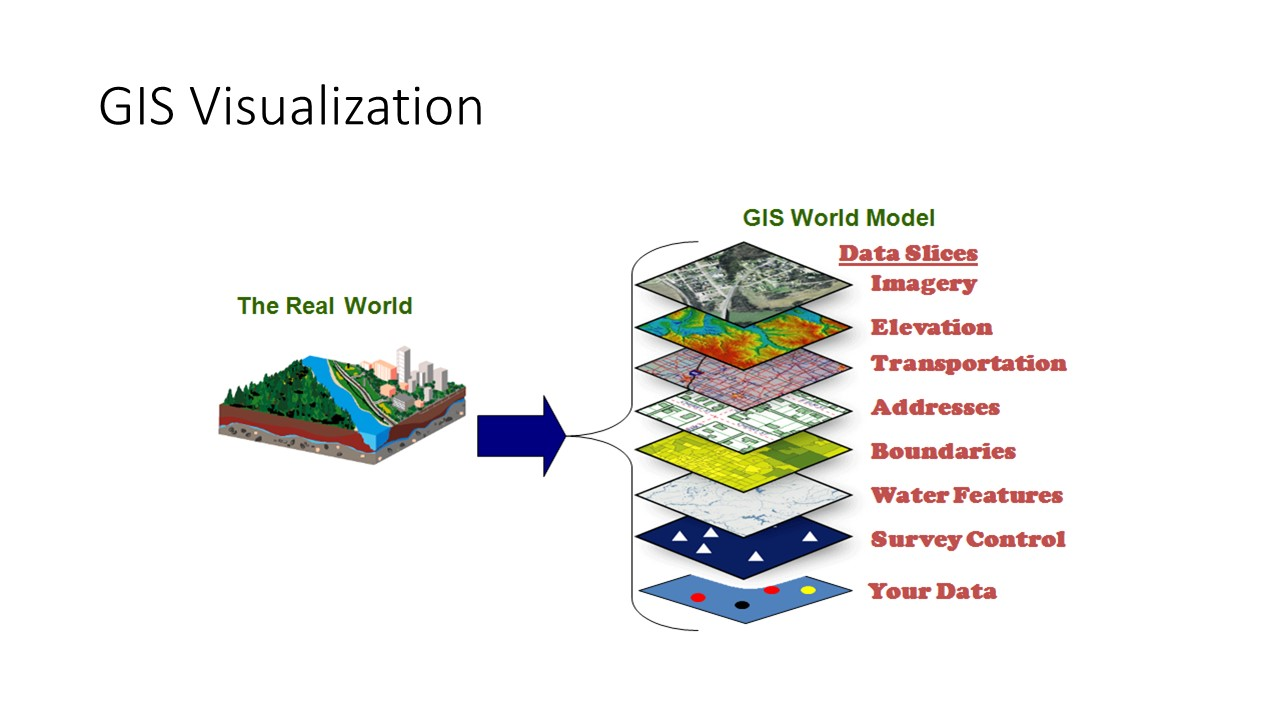

## How to achieve amplified cognition? 

Who is your audience? 

What are their goals when approaching a visualization? 

Select visual representation that works for the dataset and for the message or story you want to communicate

Why are you doing it? 


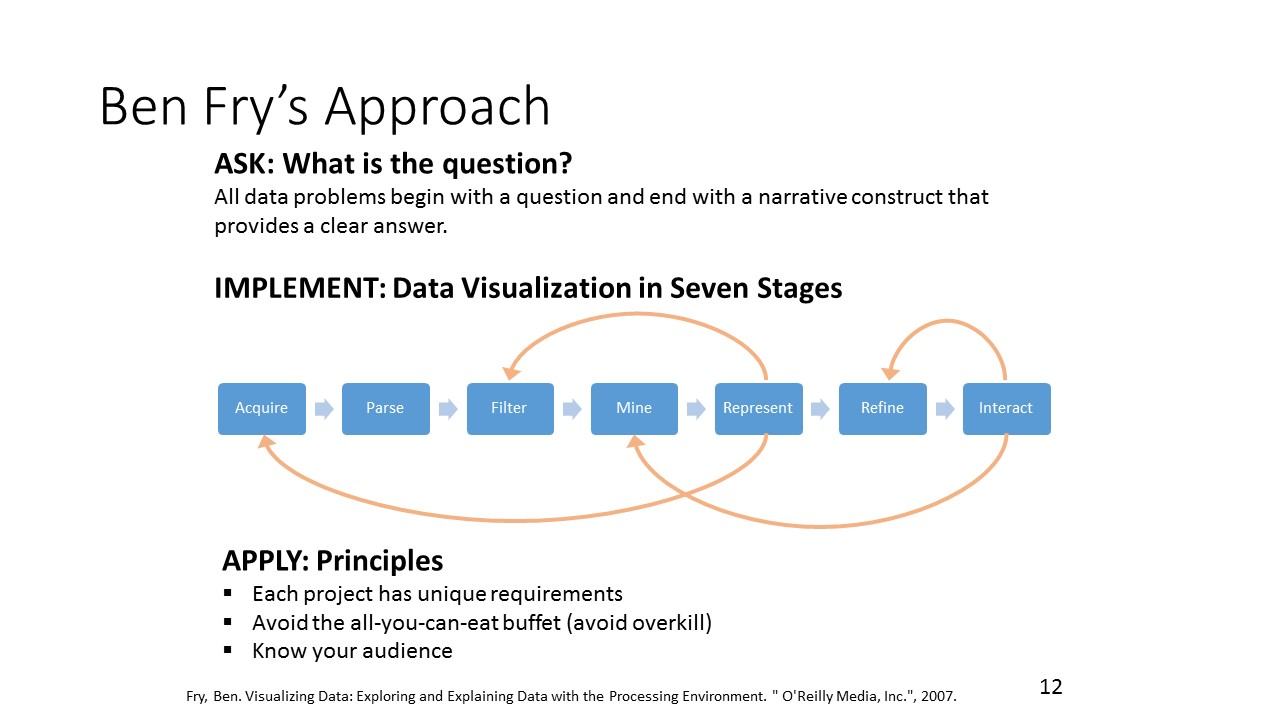

## Develop visualizations using Ben’s Fry approach

Acquire: the process to collect data from the source.

Parse: a process of transformation to a usable format. Then, classify and categorize the data elements. Example, string, character, float, integer, etc. 

Filter: create relevant data set for analysis. Remove noisy data

Mine: iterate through the entire measurement space, identify patterns to determine minimum and maximum values, and contextualize the data.

Represent: identify a graphic design method, such as scatterplots, graphs, tree-based outputs, thematic maps.

Refine: modify the visual model, tailor the attributes – structure, color, font to the audience to make it clearer, readable, easy to interpret, and intellectually engaging

Interact: Add features to make the output more interactive and exploratory to the user.


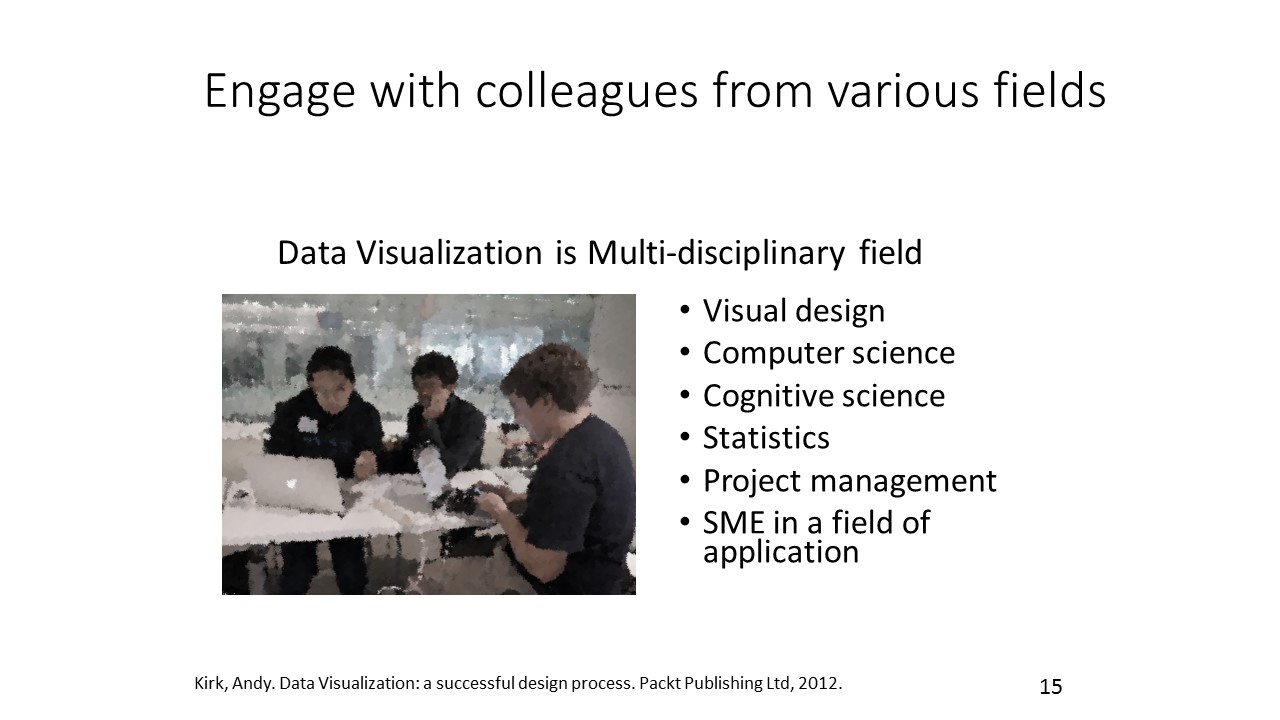

# Examples of GIS maps

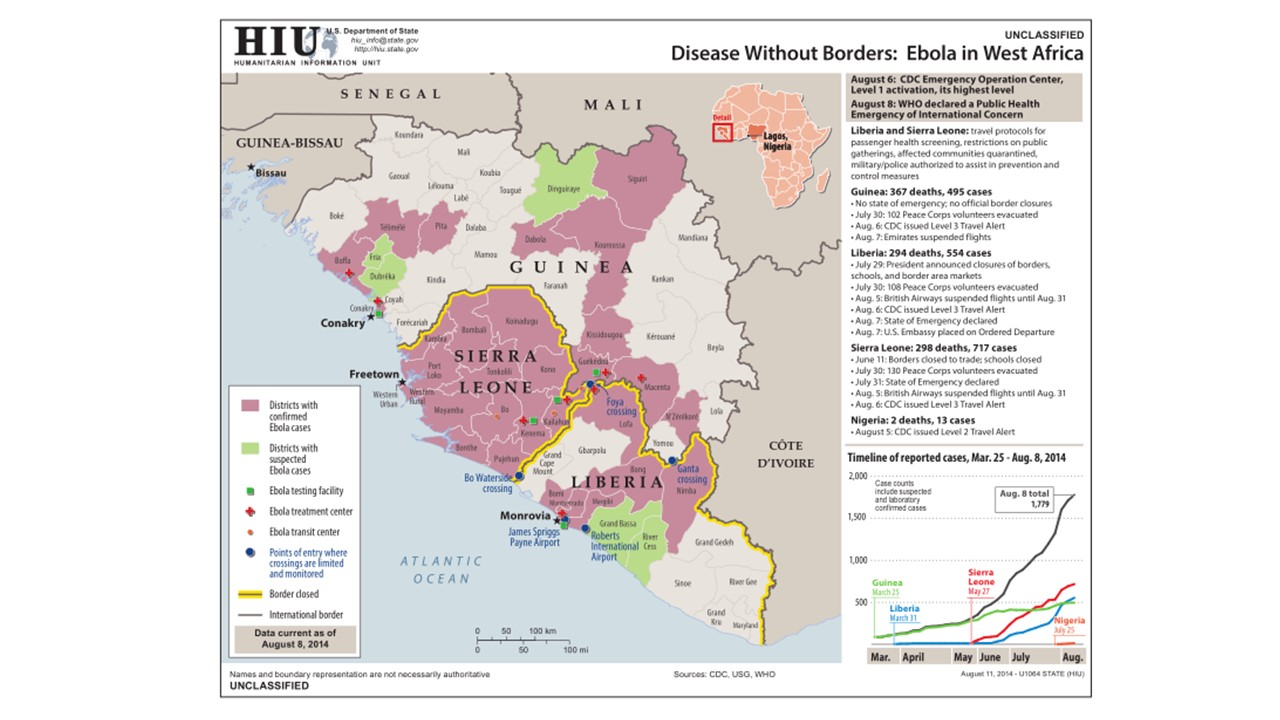

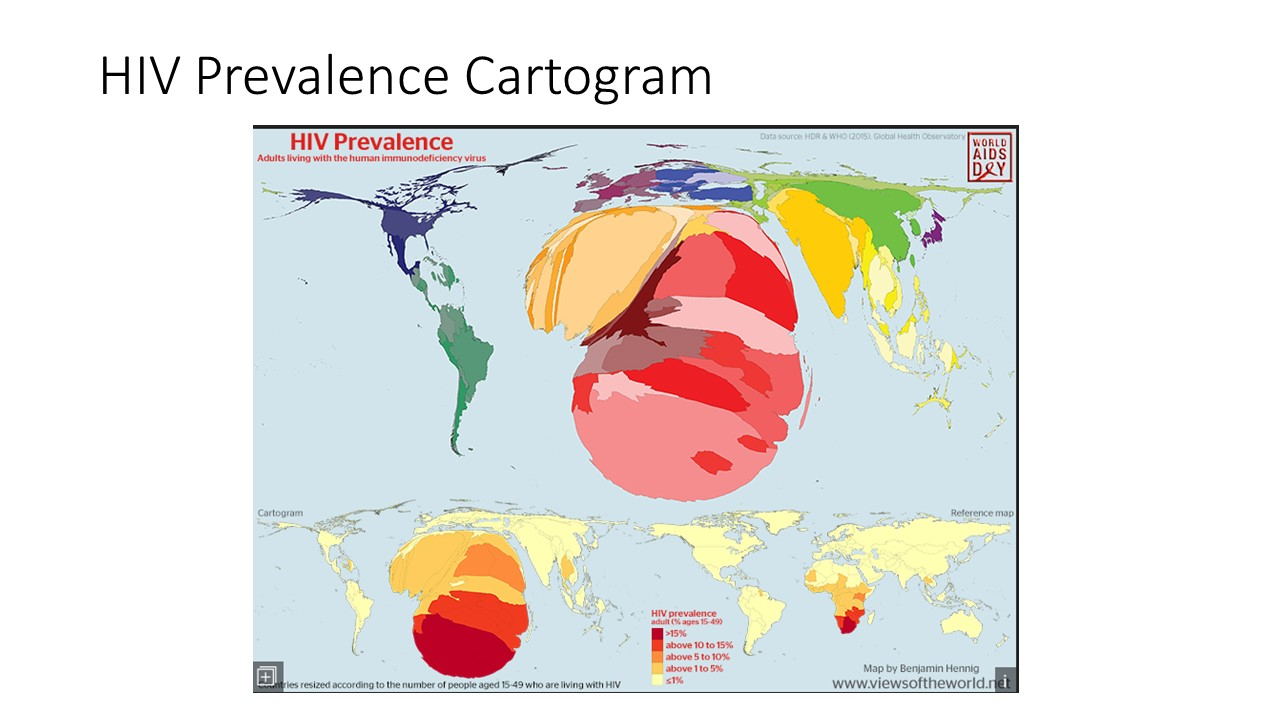

# US Population 2015

In [3]:
import folium
import pandas as pd
import os

https://github.com/python-visualization/folium

https://pypi.org/project/folium/0.2.0/

https://pandas.pydata.org/

In [4]:
us_states = os.path.join('data', 'us_states.geojson')

us_pop_landscan2015 = os.path.join('data', 'us_pop_landscan2015.csv')
csvtable = pd.read_csv(us_pop_landscan2015)

map = folium.Map(location=[48, -102], zoom_start=3)

map.choropleth(
    geo_data=us_states,
    name='choropleth',
    data=csvtable,
    columns=['id', 'SUM'],
    key_on='feature.properties.id',
    threshold_scale=[0, 5000000, 10000000, 20000000, 30000000, 40000000],
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Population 2015")

folium.LayerControl().add_to(map)
map


# Mapping John Snow Cholera Outbreak in London

In [5]:
SOHO_COORDINATES = (51.513578, -0.136722)
map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)
folium.TileLayer('stamentoner').add_to(map1)

In [6]:
deaths_df = pd.read_pickle("resources/deaths_df.pickle")
pumps_df = pd.read_pickle("resources/pumps_df.pickle")

In [7]:
locationlist = deaths_df[["LAT","LON"]].values.tolist()
radiuslist = deaths_df[["DEATHS"]].values.tolist()

In [8]:
# Iterate through the rows of the cholera deaths data frame 
#    and add each cholera death to map1
for i in range(0, len(locationlist)):
    folium.RegularPolygonMarker(locationlist[i], \
                                fill_color="red", \
                                number_of_sides=12, \
                                radius=radiuslist[i]).add_to(map1) 

map1    

In [9]:
# iterate through the rows of the pumps data frame and add each water pump to map1
for each in pumps_df.iterrows():
    #add each water pump to map1
    folium.RegularPolygonMarker([each[1]['LAT'],each[1]['LON']], \
                                fill_color='blue', \
                                number_of_sides=4, \
                                radius=10).add_to(map1)
map1 

In [10]:
# Add mean center marker weighted by deaths
deaths_df['product_LAT'] = deaths_df['LAT'] * deaths_df['DEATHS']
deaths_df['product_LON'] = deaths_df['LON'] * deaths_df['DEATHS']

# Let's copy this dataframe to a new one which we can save (pickle)
mean_center_df = deaths_df

In [11]:
# Let's display it. Type the command to display mean_center_df below.
mean_center_df.head(5)


,FID,DEATHS,LON,LAT,product_LAT,product_LON
0,0,3,-0.137930,51.513418,154.540254,-0.413790
1,1,2,-0.137883,51.513361,103.026722,-0.275766
2,2,1,-0.137853,51.513317,51.513317,-0.137853
3,3,1,-0.137812,51.513262,51.513262,-0.137812
4,4,4,-0.137767,51.513204,206.052816,-0.551068


In [12]:
mean_center_df.to_pickle("resources/mean_center_df.pickle")

In [13]:
import numpy as np

# This corresponds to y in the mean center formula
mean_LAT=np.sum(deaths_df['product_LAT'])/np.sum(deaths_df['DEATHS'])

# This corresponds to the x in the mean center formula
mean_LON=np.sum(deaths_df['product_LON'])/np.sum(deaths_df['DEATHS'])

# Let's put these two together as coordinates
mean_POINT = (mean_LAT, mean_LON)

mean_POINT

(51.51339831083845, -0.1364029734151329)

In [14]:
folium.RegularPolygonMarker(mean_POINT, \
                                fill_color="yellowgreen", \
                                number_of_sides=12, \
                                radius=10).add_to(map1)
map1

# Questions:

## What is data visualization? 
## Advantages of data visualization?
## How to design effective data visualization?